In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):

        self.mean = np.mean(X, axis=0)
        
        # Считаем матрицу ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)
        
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #Сортируем по возрастанию
        
        # Берём первые n главных компонент
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]
        
        return self
    
    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(15,7)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'b-o',
                 label='Все собственные значения',
                 linewidth = 3)
        plt.plot(self.values[:self.n_components],'r-o',
                 label='Собственное Пространство',
                 markersize = 10, mfc='none',
                 linewidth = 2, alpha = 0.8)
        plt.ylabel('собственные\n значения', fontsize=25)
        plt.grid();
        plt.legend(fontsize=25);
        plt.xticks(fontsize = 25); plt.yticks(fontsize = 25);
        plt.tight_layout();      

#### Загружаем данные MNIST

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.2 Поэкспериментируем с количеством компонент при применении метода главных компонент (3 варианта)

Подготовим данные

In [5]:
X = X / 255.
X_ = X.values

Применим метод главных компонент и поэксперементируем с числом главных компонент

In [6]:
for i in [200, 100, 50, 25, 10]:
    pca = PCA(n_components=i)
    pca.fit(X_)
    re = pca.score(X_)
    print('Число компонент: ', i, ' ---- score: ', round(re,4))

Число компонент:  200  ---- score:  0.9763
Число компонент:  100  ---- score:  0.9399
Число компонент:  50  ---- score:  0.8765
Число компонент:  25  ---- score:  0.7829
Число компонент:  10  ---- score:  0.6388


При числе компонент:200 наибольший score = 0.9763

##### Рассмотрим случай с n_components=50

In [11]:
pca = PCA(n_components=50)
X_result = pca.fit_transform(X_)
pca_inverse = pca.inverse_transform(X_result)
pca_inverse.shape

(70000, 784)

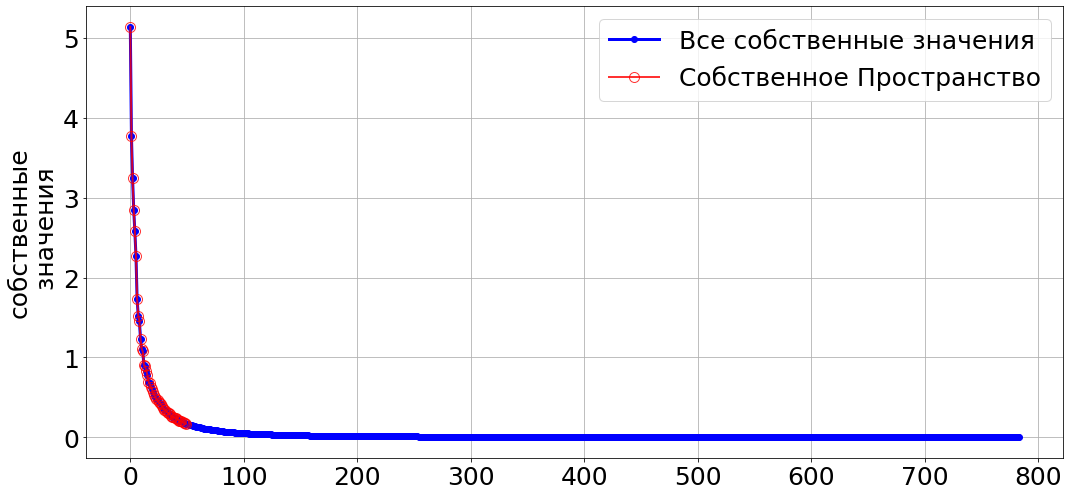

In [12]:
pca.plot_eigvalues();

#### 3.3 Визуализируем пространства главных компонент

In [13]:
def plot_multi(data, y,  names):
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]


    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    fig, sub = plt.subplots(2, 2, figsize = (11,11))
    i = 0
    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y, s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' ); 
        
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)     
        ax.grid()
        ax.set_xlim([-10,12])
        ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Цифры",
                        fontsize = 15)
        ax.add_artist(legend1)
        i+=1

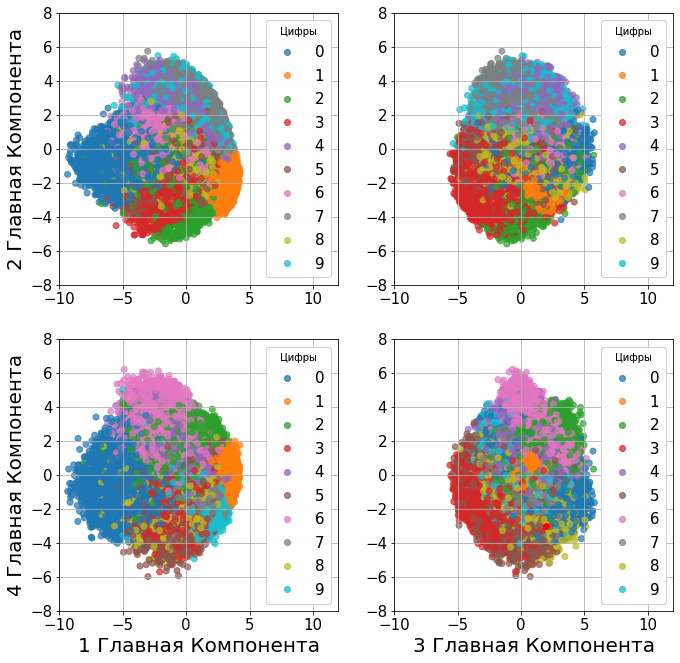

In [18]:
pca_names = [str(x+1)+' Главная Компонента' for x in range(4)]

plot_multi(X_result, y.astype(int), pca_names)

#### 3.4 На данных MNIST определим каким цифрам соответствуют точки со следующими координатами 

PCA- 1 -7 -- не существует

PCA- 2 0  -- 4 

PCA- 1 4  -- 7

PCA- 4 1  -- 6

PCA- 3 0  -- 0

PCA- 4 5  -- не существует 

PCA- 3 -4 --  1

PCA- 2 -3 -- 8

### Рассмотрим на данных Car Moldova

In [53]:
df = pd.read_csv('cars_moldova_cat_num (2).csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,40,92,2011,4,195000,1800,2,1,7750,11,17727.272727
1,32,62,2014,11,135000,1500,0,0,8550,8,16875.000000
2,32,71,2012,11,110000,1500,0,0,6550,10,11000.000000
3,28,23,2006,11,200000,1600,3,0,4100,16,12500.000000
4,23,124,2000,5,300000,2200,0,0,3490,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000,1800,4,1,11500,6,14666.666667
32070,19,53,2002,3,225000,1800,3,0,4400,20,11250.000000
32071,6,77,2015,11,89000,1500,0,0,7000,7,12714.285714
32072,22,10,2006,1,370000,2000,0,0,4000,16,23125.000000


In [54]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year'] 

### Применим PCA к данному набору данных

Применим пространство главных компонент в качестве входных данных для алгоритма классификации типа трансмиссии

In [55]:
y = df["Transmission"]
x = df.drop(columns=['Transmission'],axis=1)

#### Рассмотрим PCA только на числовых признаках

Посмотрим на score при разном числе компонент

In [78]:
for i in [4, 3, 2]:
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(df1)
    pca = PCA(n_components=i)
    pca.fit(X_sc)
    re = pca.score(X_sc)
    print('Число компонент: ', i, ' ---- score: ', round(re,4))

Число компонент:  4  ---- score:  0.9766
Число компонент:  3  ---- score:  0.9123
Число компонент:  2  ---- score:  0.6829


In [56]:
df1 = df[num_columns].copy()

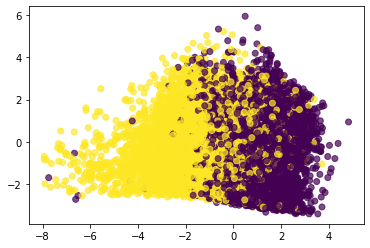

eigenvalues [1.9631804  1.45147536 1.14686488 0.32150799 0.11712727]
score: 0.976575275448624


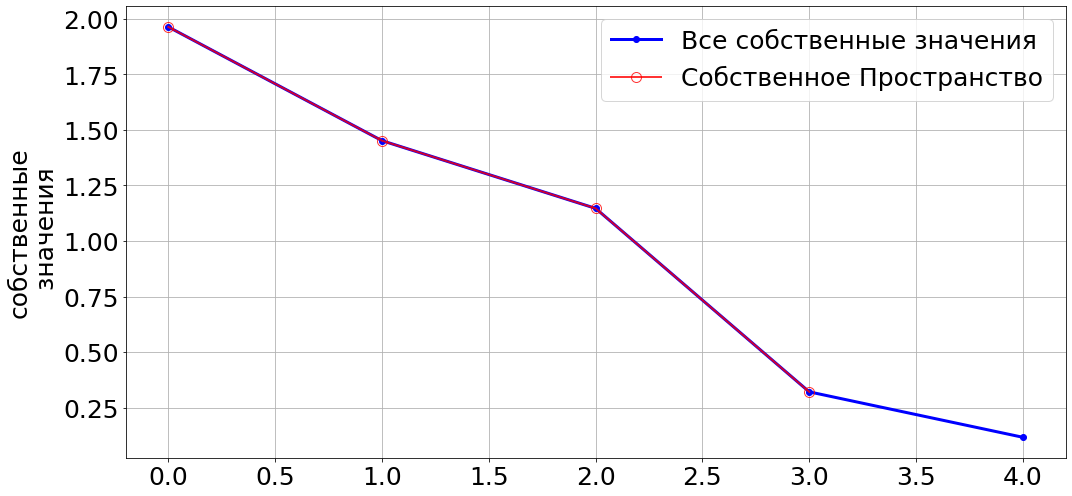

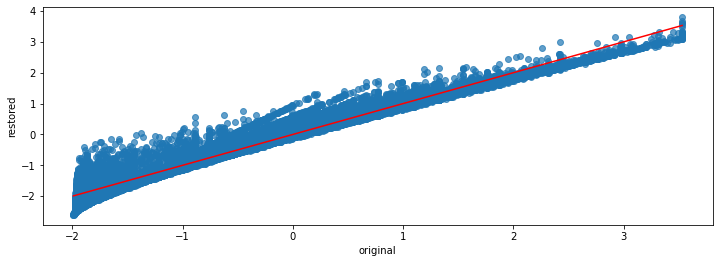

In [57]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(df1)
pca = PCA(n_components=4)
pca.fit(X_sc)
x_tr = pca.transform(X_sc)
labels = df.Transmission.values
plt.scatter(x_tr[:,0], x_tr[:,1], c =labels, alpha = 0.7); 
plt.show()

print('eigenvalues',pca.values)
pca.plot_eigvalues()

print('score:',pca.score(X_sc))

X2 = pca.inverse_transform(x_tr)
plt.figure(figsize=(12,4))
plt.scatter(X_sc[:,1],X2[:,1],alpha = 0.7 )
plt.plot([X_sc[:,1].min(),X_sc[:,1].max()],[X_sc[:,1].min(),X_sc[:,1].max()], 'r')
plt.xlabel('original')
plt.ylabel('restored');

In [58]:
def funcs(pca, n, columns):
    fig=plt.figure(figsize=(10,10))
    W = pca.components.T
    pca_names = ['pca-'+str(x+1) for x in range(n)]
    plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
    for (i, j), z in np.ndenumerate(W):
        plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'xx-large')
    plt.xticks(np.arange(0, W.shape[1]), columns,rotation = 45)
    plt.yticks(np.arange(0, W.shape[0]),pca_names)
    plt.colorbar();

In [59]:
columns = list(df[num_columns].columns)

In [60]:
columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

Связь главных компонент с исходными признаками

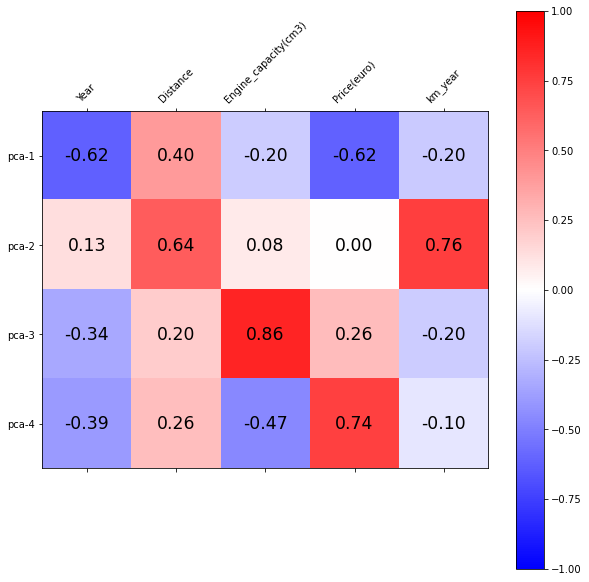

In [61]:
funcs(pca,4, columns)

### PCA c учетом категориальных признаков

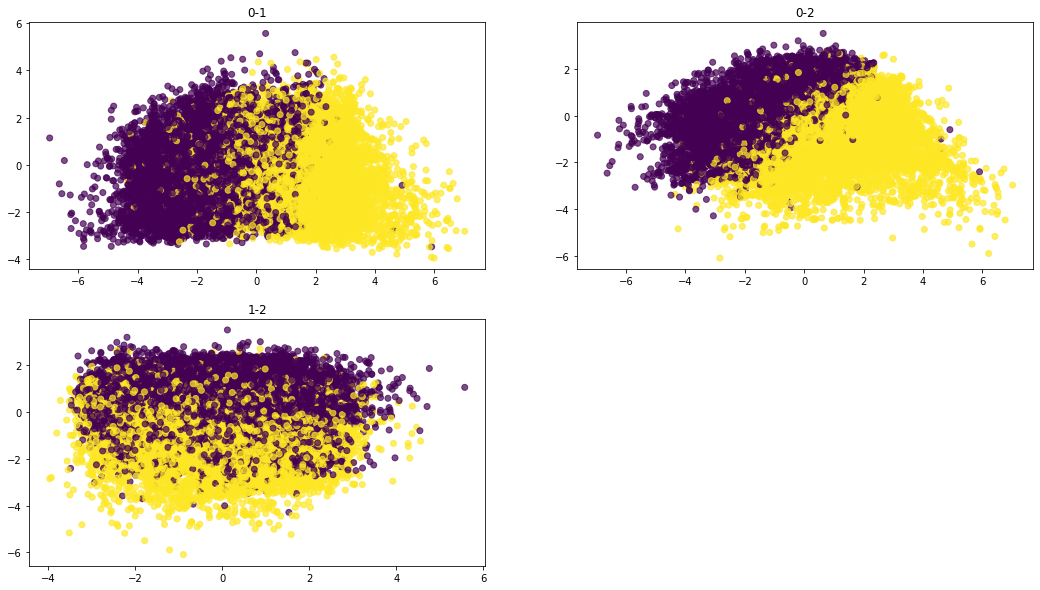

score: 0.8512994202357865


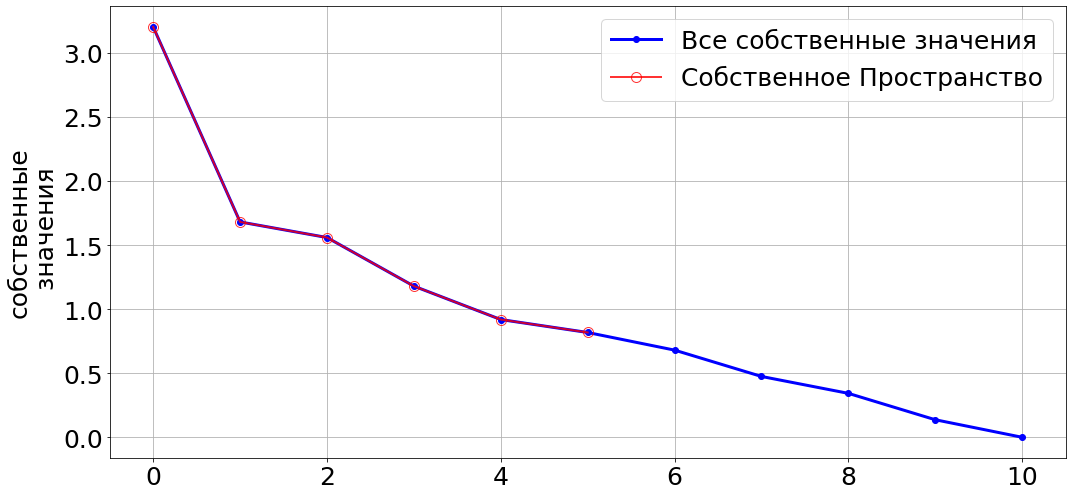

In [62]:
scaler    = StandardScaler()
X_cluster = scaler.fit_transform(df)
pca = PCA(n_components=6)

X_new = pca.fit_transform(X_cluster)
labels = df.Transmission.values
plt.figure(figsize=(18,10))
plt.subplot(221); plt.scatter(X_new[:,0],X_new[:,1], c =labels, alpha = 0.7); plt.title("0-1")
plt.subplot(222); plt.scatter(X_new[:,0],X_new[:,2], c =labels, alpha = 0.7); plt.title("0-2")
plt.subplot(223); plt.scatter(X_new[:,1],X_new[:,2], c =labels, alpha = 0.7); plt.title("1-2")
plt.show();

print('score:',pca.score(X_cluster))
pca.plot_eigvalues()

In [63]:
columns = list(df.columns)

Связь главных компонент с исходными признаками

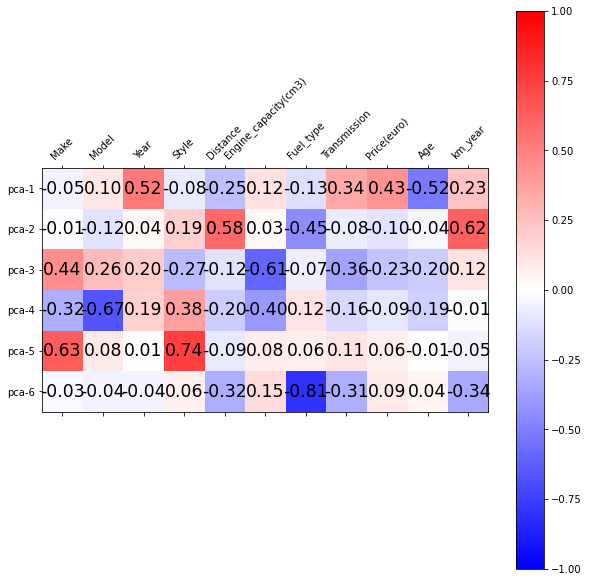

In [64]:
funcs(pca,6, columns)

#### Применим пространство главных компонент в качестве входных данных для алгоритмов  классификации типа Трансмиссии 

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [66]:
def rs(x,y):
    model = LogisticRegression()
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    print(classification_report(y_test,pred))

С применением PCA только к числовым признакам

In [67]:
rs(x_tr,y)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3525
           1       0.83      0.74      0.78      2890

    accuracy                           0.81      6415
   macro avg       0.82      0.81      0.81      6415
weighted avg       0.81      0.81      0.81      6415



С применением PCA  к числовым и категориальным признакам

In [68]:
rs(X_new,y)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3525
           1       0.97      0.97      0.97      2890

    accuracy                           0.97      6415
   macro avg       0.97      0.97      0.97      6415
weighted avg       0.97      0.97      0.97      6415



Сравним с результатом на исходных данных (без PCA)

In [82]:
rs(df,y)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3525
           1       0.83      0.74      0.78      2890

    accuracy                           0.81      6415
   macro avg       0.82      0.81      0.81      6415
weighted avg       0.82      0.81      0.81      6415



In [83]:
df3 = {'How': ['PCA_only_num','PCA_only_num', 'PCA_all','PCA_all', 'without_PCA', 'without_PCA'], 
       'comp': ['0', '1', '0', '1', '0', '1'], 
       "F1": [0.84, 0.78, 0.97, 0.97, 0.84, 0.78]}

In [84]:
df3 = pd.DataFrame(df3) 
df3

,How,comp,F1
0,PCA_only_num,0,0.84
1,PCA_only_num,1,0.78
2,PCA_all,0,0.97
3,PCA_all,1,0.97
4,without_PCA,0,0.84
5,without_PCA,1,0.78


Наилучший результат при применении PCA ко всем данным